<a href="https://colab.research.google.com/github/jpolakov/Group16_GroupProject__ML_UoW/blob/main/G16_ML_BlackFridaySalesPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Machine Learning Course - Group Assignment - Black Friday Sales Prediction

### Group 16

* Nakul Ghate 
* Nima Sajedi
* Jana Taha
* Faider Florez Valencia
* Juraj Polakovic


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
os.environ['DS_CONFIG_DIR'] = "/content/drive/My Drive/Group 16 - DS 4"
path = os.environ['DS_CONFIG_DIR']
os.chdir(path)

In [ ]:
ls

 data/                                    'Group 16 - Report.gdoc'
 G16_ML_BlackFridaySalesPrediction.ipynb  'Group 16 - Summary.gdoc'



### Objectives and goals:
* Build ML models which will help store to predict the amount of purchase based on customer purchase trends for different products.


## Libraries and methods

In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import  f_regression

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
import xgboost as xgb

from sklearn import metrics

In [ ]:
def rmse(a, b):
    return np.sqrt(np.mean((a-b)**2))

In [ ]:
def display_scores(scores):
    print("Scores:", np.sqrt(-scores))
    print("Mean:", np.sqrt(-scores).mean())
    print("Standard deviation:", np.sqrt(-scores).std())

In [ ]:
def display_positive_scores(scores):
    print("Scores:", np.sqrt(scores))
    print("Mean:", np.sqrt(scores).mean())
    print("Standard deviation:", np.sqrt(scores).std())

In [ ]:
def plot_roc_curve(fpr, tpr):    
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

## Dataset

* The dataset we are going to use is the Black Friday dataset from Kaggle which contains about 550068 rows and 12 features that can be downloaded <a href="https://www.kaggle.com/sdolezel/black-friday">here</a>.

* Problem: Supervised Regression type.

#### Attributes:
| Column ID |         Column Name        | Data type |           Description           | Masked |
|:---------:|:--------------------------:|:---------:|:-------------------------------:|--------|
|     0     |           User_ID          |   int64   |      Unique Id of customer      | False  |
|     1     |         Product_ID         |   object  |       Unique Id of product      | False  |
|     2     |           Gender           |   object  |         Sex of customer         | False  |
|     3     |             Age            |   object  |         Age of customer         | False  |
|     4     |         Occupation         |   int64   |   Occupation code of customer   | True   |
|     5     |        City_Category       |   object  |         City of customer        | True   |
|     6     | Stay_In_Current_City_Years |   object  | Number of years of stay in city | False  |
|     7     |       Marital_Status       |   int64   |    Marital status of customer   | False  |
|     8     |     Product_Category_1     |   int64   |       Category of product       | True   |
|     9     |     Product_Category_2     |  float64  |       Category of product       | True   |
|     10    |     Product_Category_3     |  float64  |       Category of product       | True   |
|     11    |          Purchase          |   int64   |         Purchase amount         | False  |

In [ ]:
# Datasets Imports
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

## Step 1: Data - Descriptive analysis

In [ ]:
# Training dataset check
train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [ ]:
# Testing dataset check
test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [ ]:
# Training dataset shape
print('Training data: \nRows: {} Columns: {}'.format(train.shape[0], train.shape[1]))

Training data: 
Rows: 550068 Columns: 12


In [ ]:
# Testing dataset shape
print('Testing data: \nRows: {} Columns: {}'.format(test.shape[0], test.shape[1]))

Testing data: 
Rows: 233599 Columns: 11


In [ ]:
# Features data-type check
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [ ]:
# Null values check
round((train.isnull().sum() / train.shape[0]) * 100, 2).astype(str) + ' %'

User_ID                         0.0 %
Product_ID                      0.0 %
Gender                          0.0 %
Age                             0.0 %
Occupation                      0.0 %
City_Category                   0.0 %
Stay_In_Current_City_Years      0.0 %
Marital_Status                  0.0 %
Product_Category_1              0.0 %
Product_Category_2            31.57 %
Product_Category_3            69.67 %
Purchase                        0.0 %
dtype: object

In [ ]:
# Statistics check
train.describe().T

,count,mean,std,min,25%,50%,75%,max
User_ID,550068.0,1.003029e+06,1727.591586,1000001.0,1001516.0,1003077.0,1004478.0,1006040.0
Occupation,550068.0,8.076707e+00,6.522660,0.0,2.0,7.0,14.0,20.0
Marital_Status,550068.0,4.096530e-01,0.491770,0.0,0.0,0.0,1.0,1.0
Product_Category_1,550068.0,5.404270e+00,3.936211,1.0,1.0,5.0,8.0,20.0
Product_Category_2,376430.0,9.842329e+00,5.086590,2.0,5.0,9.0,15.0,18.0
Product_Category_3,166821.0,1.266824e+01,4.125338,3.0,9.0,14.0,16.0,18.0
Purchase,550068.0,9.263969e+03,5023.065394,12.0,5823.0,8047.0,12054.0,23961.0


In [ ]:
# Stay_In_Current_City_Years feature - Unique values counts check
round((train['Stay_In_Current_City_Years'].value_counts(normalize = True).mul(100)), 2).astype(str) + ' %'

1     35.24 %
2     18.51 %
3     17.32 %
4+     15.4 %
0     13.53 %
Name: Stay_In_Current_City_Years, dtype: object

In [ ]:
# AGE feature - Unique values counts check
round((train['Age'].value_counts(normalize = True).mul(100)), 2).astype(str) + ' %'

26-35    39.92 %
36-45     20.0 %
18-25    18.12 %
46-50     8.31 %
51-55      7.0 %
55+       3.91 %
0-17      2.75 %
Name: Age, dtype: object

### Checkpoint
* 'Age' and 'Stay_In_Current_City_Years' contain some values which will need to be taken care of (+ signs) 
* 'Product_Category_2' contains 31.57% null values which can imputed  
* 'Product_Category_3' contains 69.67% null values so we can drop this feature.


## Data - Exploratory  Analysis

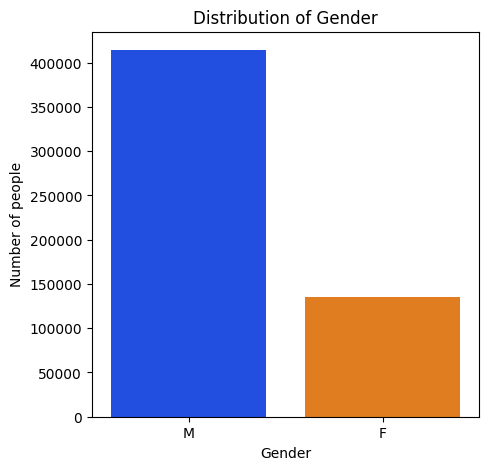

In [ ]:
# Gender barplot
gen = train['Gender'].value_counts()

plt.figure(figsize = (5, 5))
sns.barplot(gen.index, gen.values, palette = 'bright')
plt.title('Distribution of Gender')
plt.xlabel('Gender')
plt.ylabel('Number of people')
plt.tick_params(labelsize = 10)
plt.show()

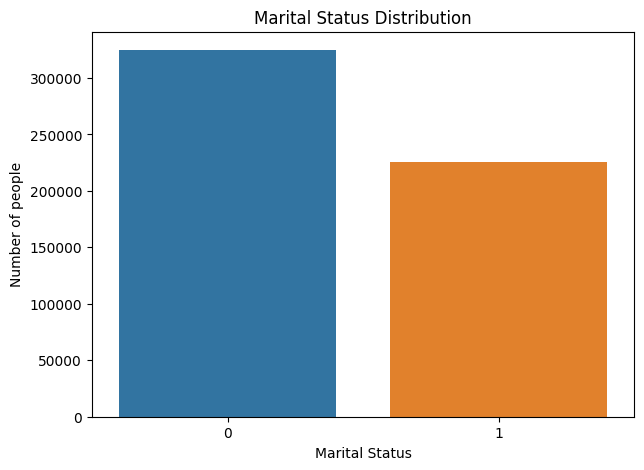

In [ ]:
# 'Marital Status' countplot
plt.figure(figsize = (7, 5))
sns.countplot(train['Marital_Status'])
plt.title('Marital Status Distribution')
plt.xlabel('Marital Status')
plt.ylabel('Number of people')
plt.tick_params(labelsize = 10)
plt.show()

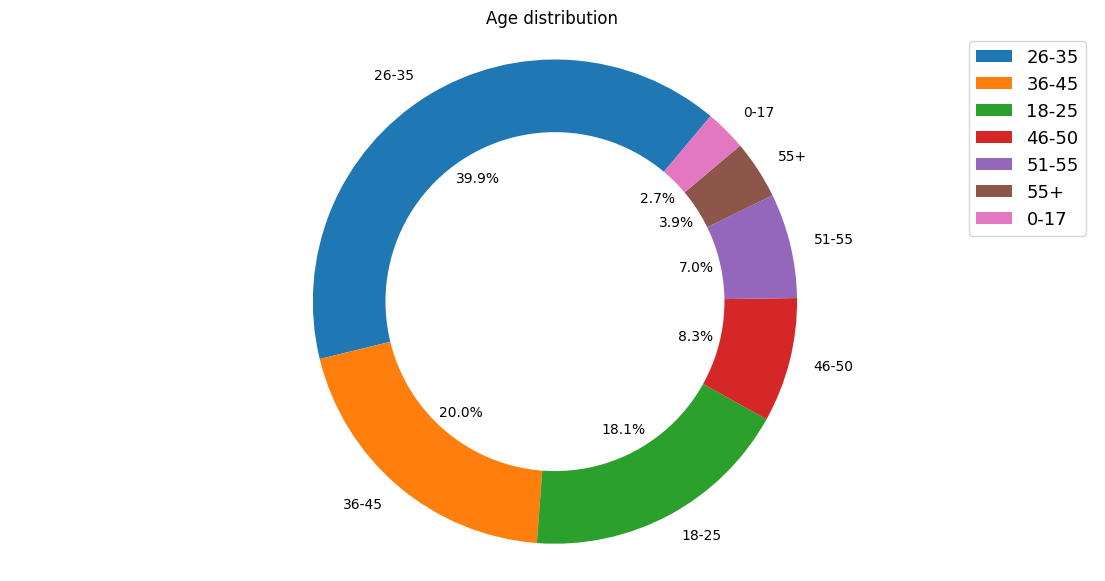

In [ ]:
# 'Age' chart
age = train['Age'].value_counts()
plt.figure(figsize = (14, 7))
plt.pie(age.values, labels = age.index, startangle = 50, autopct = '%1.1f%%')
centre_circle = plt.Circle((0, 0), 0.7, fc = 'white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Age distribution')
plt.axis('equal')
plt.legend(prop = {'size' : 13})
plt.show()

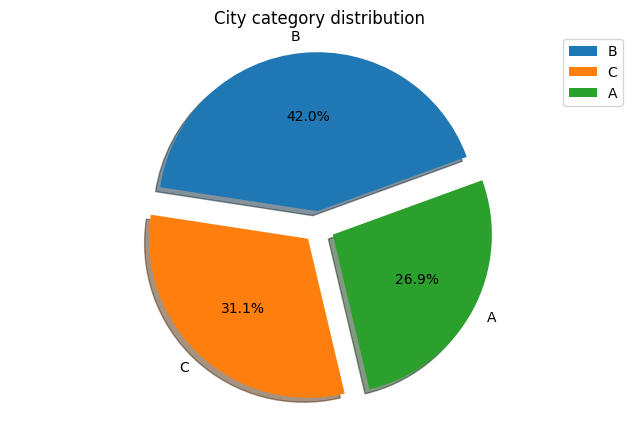

In [ ]:
# 'City Category' pie chart
city = train['City_Category'].value_counts()
plt.figure(figsize = (8, 5))
plt.pie(city.values, labels = city.index, startangle = 20, explode = (0.1 , 0.1, 0.1), shadow = True, autopct = '%1.1f%%')
plt.title('City category distribution')
plt.legend()
plt.legend(prop = {'size' : 10})
plt.axis('equal')
plt.show()

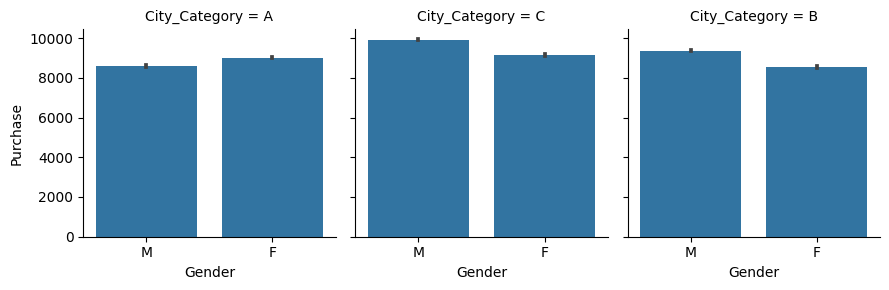

In [ ]:
# Impact of purchase on City_Category (per gender)
city = sns.FacetGrid(train,col="City_Category")
city.map(sns.barplot, "Gender", "Purchase")

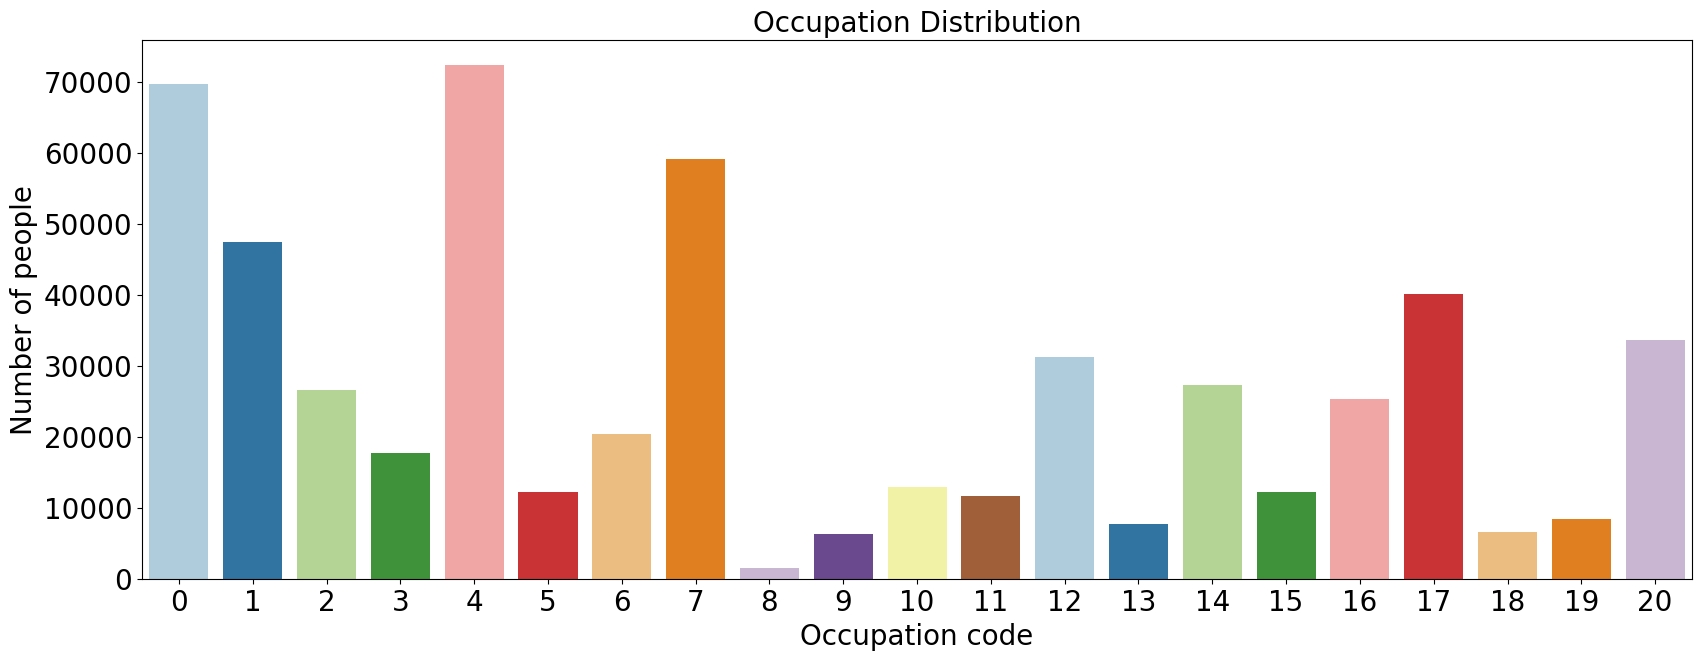

In [ ]:
# 'Occupation char
occupation = train['Occupation'].value_counts()
plt.figure(figsize = (20, 7))
sns.barplot(occupation.index, occupation.values, palette = 'Paired')
plt.title('Occupation Distribution', fontsize=20)
plt.xlabel('Occupation code', fontsize=20)
plt.ylabel('Number of people', fontsize=20)
plt.tick_params(labelsize = 20)
plt.show()

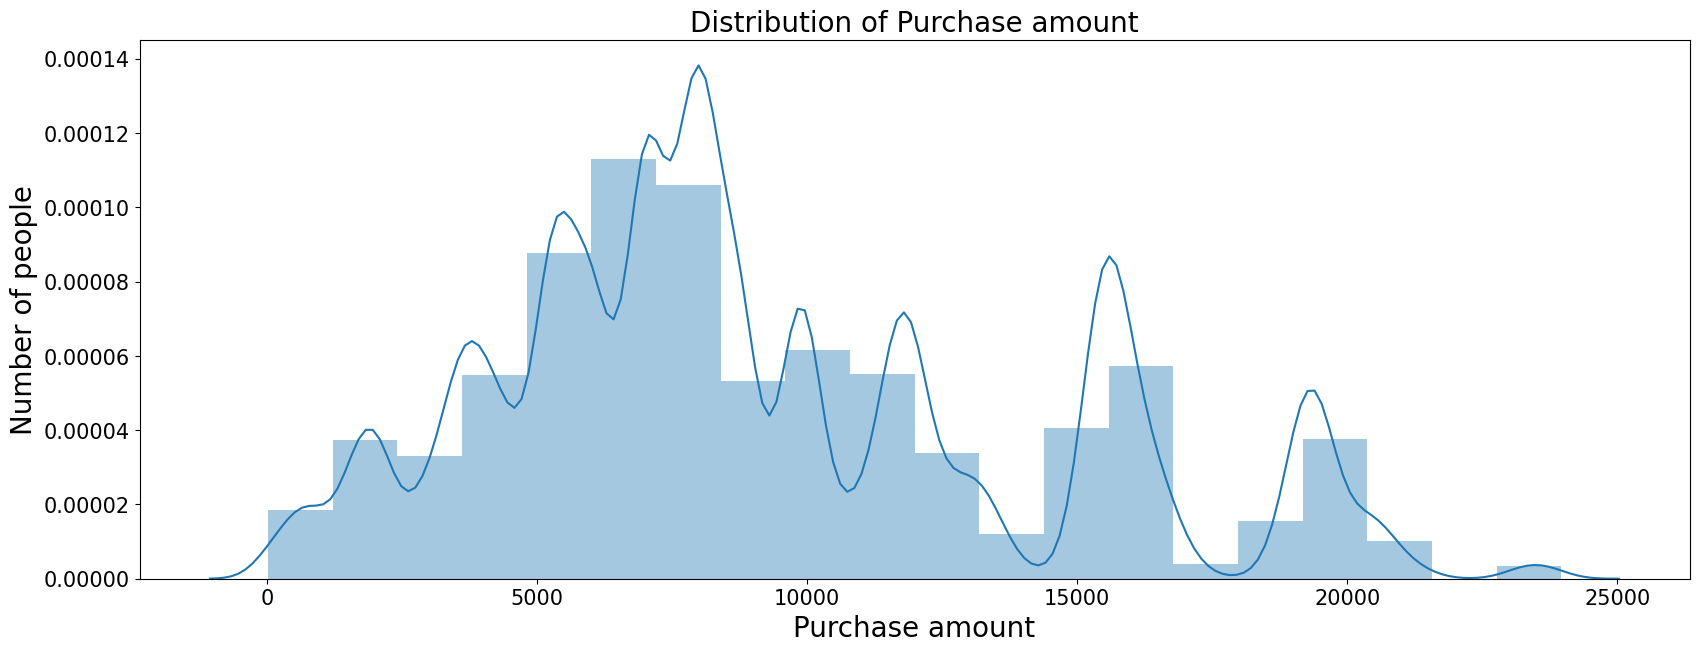

In [ ]:
# 'Purchase' distplot
plt.figure(figsize = (20, 7))
sns.distplot(train['Purchase'], bins = 20)
plt.title('Distribution of Purchase amount', fontsize=20)
plt.xlabel('Purchase amount', fontsize=20)
plt.ylabel('Number of people', fontsize=20)
plt.tick_params(labelsize = 15)
plt.show()

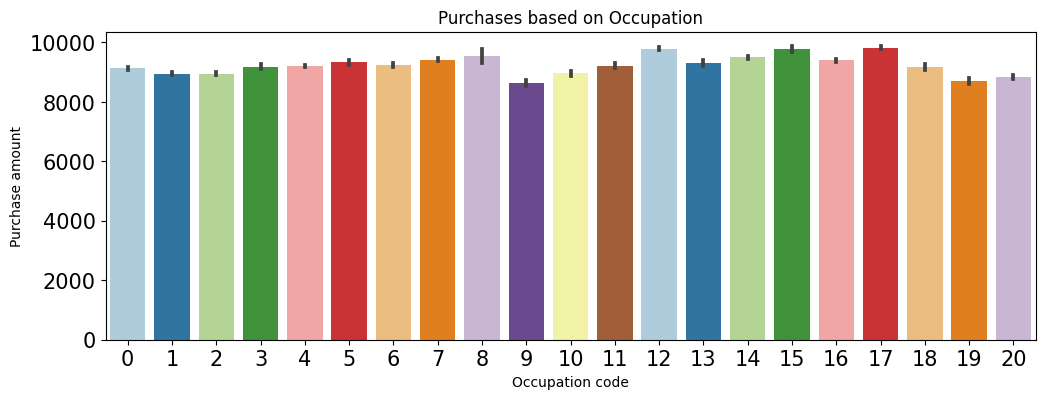

In [ ]:
# Purchase based on Occupation
plt.figure(figsize = (12, 4))

sns.barplot(train['Occupation'], train['Purchase'], palette = 'Paired')
plt.title('Purchases based on Occupation')
plt.xlabel('Occupation code', )
plt.ylabel('Purchase amount')
plt.tick_params(labelsize = 15)
plt.show()

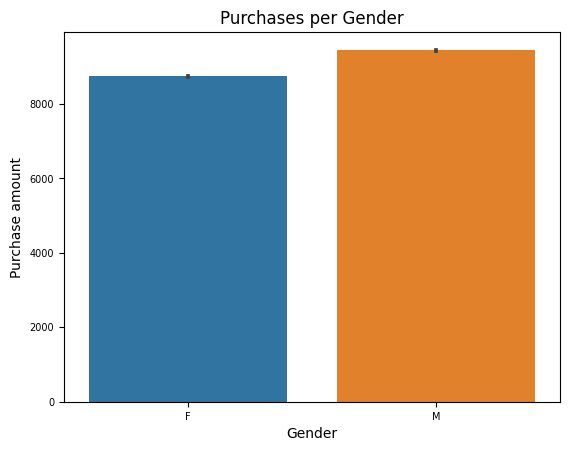

In [ ]:
# 'Purchases per Gender barplot
sns.barplot(train['Gender'], train['Purchase'])
plt.title('Purchases per Gender')
plt.xlabel('Gender')
plt.ylabel('Purchase amount')
plt.tick_params(labelsize = 7)
plt.show()

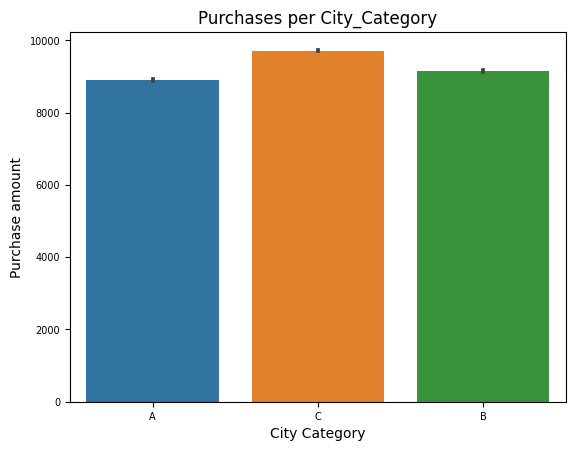

In [ ]:
# Purchases per City_Category
sns.barplot(train['City_Category'], train['Purchase'])
plt.title('Purchases per City_Category')
plt.xlabel('City Category')
plt.ylabel('Purchase amount')
plt.tick_params(labelsize = 7)
plt.show()

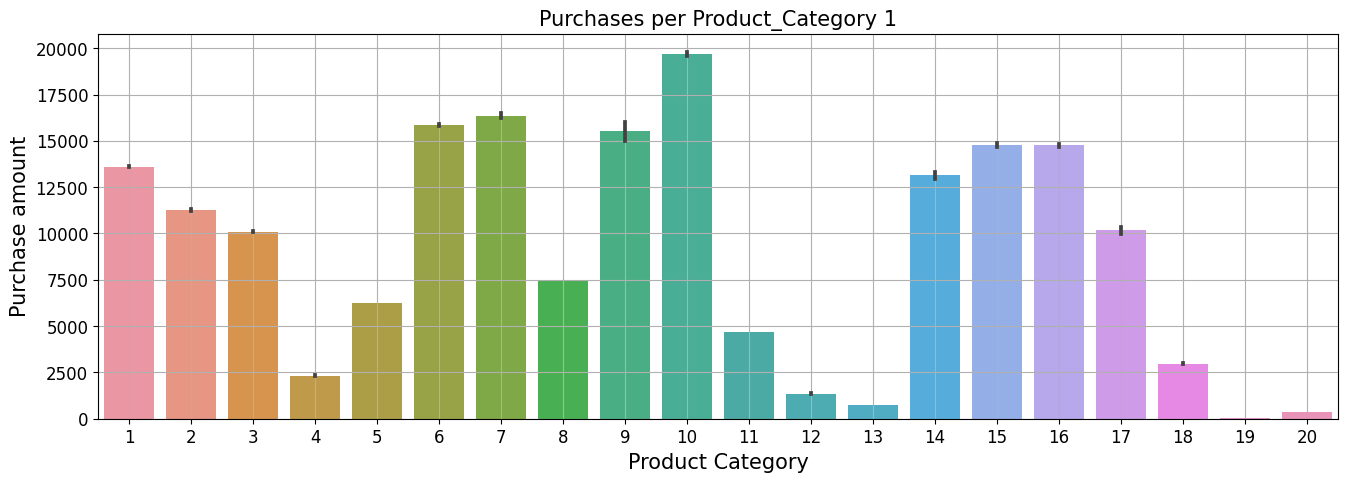

In [ ]:
# Barplot of Purchases per Product_Category_1
plt.figure(figsize = (16, 5))
sns.barplot(train['Product_Category_1'], train['Purchase'])
plt.title('Purchases per Product_Category 1', fontsize=15)
plt.xlabel('Product Category', fontsize=15)
plt.ylabel('Purchase amount', fontsize=15)
plt.tick_params(labelsize = 12)
plt.grid()
plt.show()

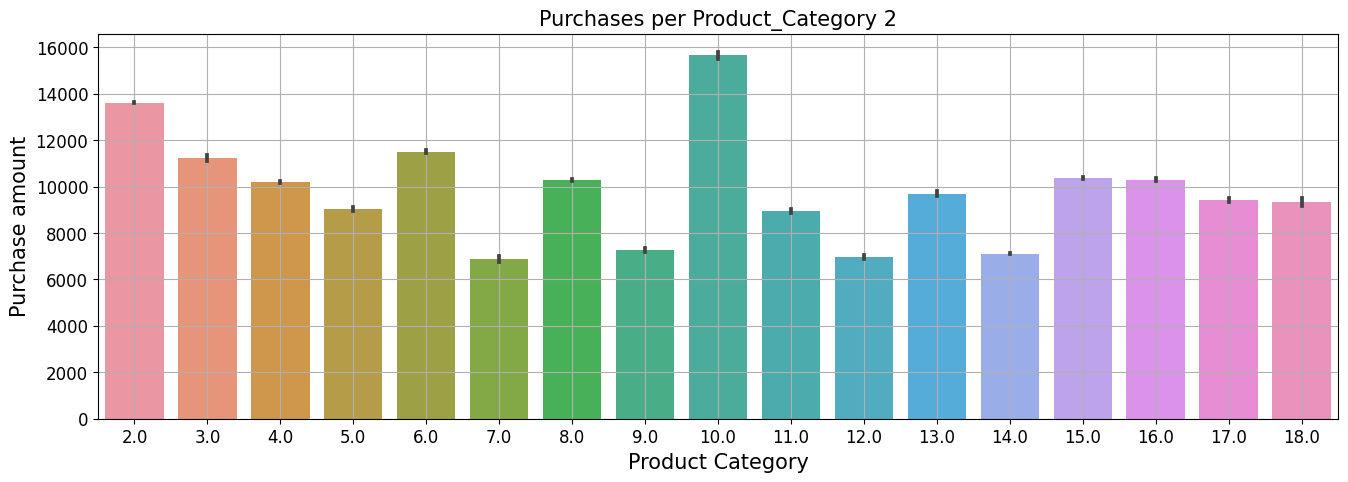

In [ ]:
# Barplot of Purchases per Product_Category_1
plt.figure(figsize = (16, 5))
sns.barplot(train['Product_Category_2'], train['Purchase'])
plt.title('Purchases per Product_Category 2', fontsize=15)
plt.xlabel('Product Category', fontsize=15)
plt.ylabel('Purchase amount', fontsize=15)
plt.tick_params(labelsize = 12)
plt.grid()
plt.show()

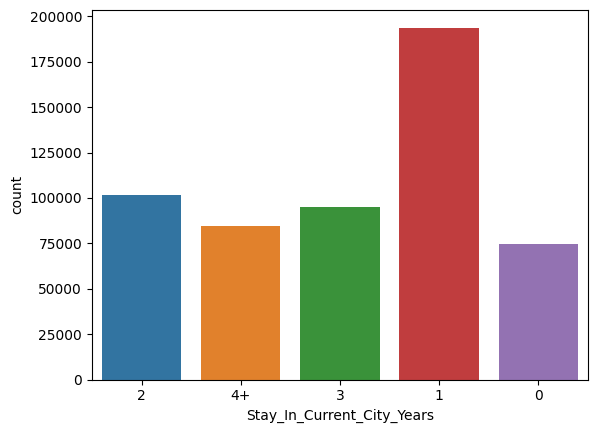

In [ ]:
# Stay_In_Current_City_Years Treemap
sns.countplot(train['Stay_In_Current_City_Years'])

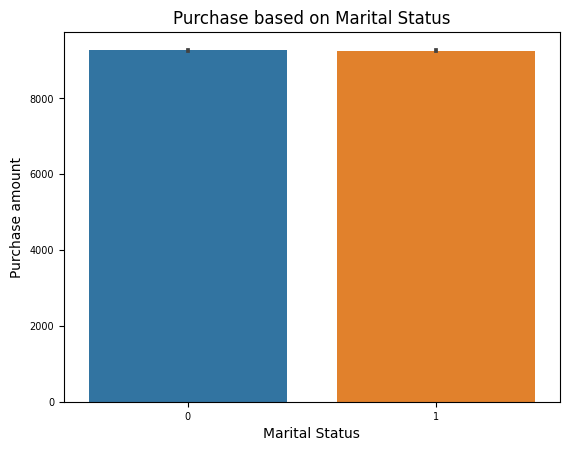

In [ ]:
# Purchase based on Marital Status barplot
sns.barplot(train['Marital_Status'], train['Purchase'])
plt.title('Purchase based on Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Purchase amount')
plt.tick_params(labelsize = 7)
plt.show()

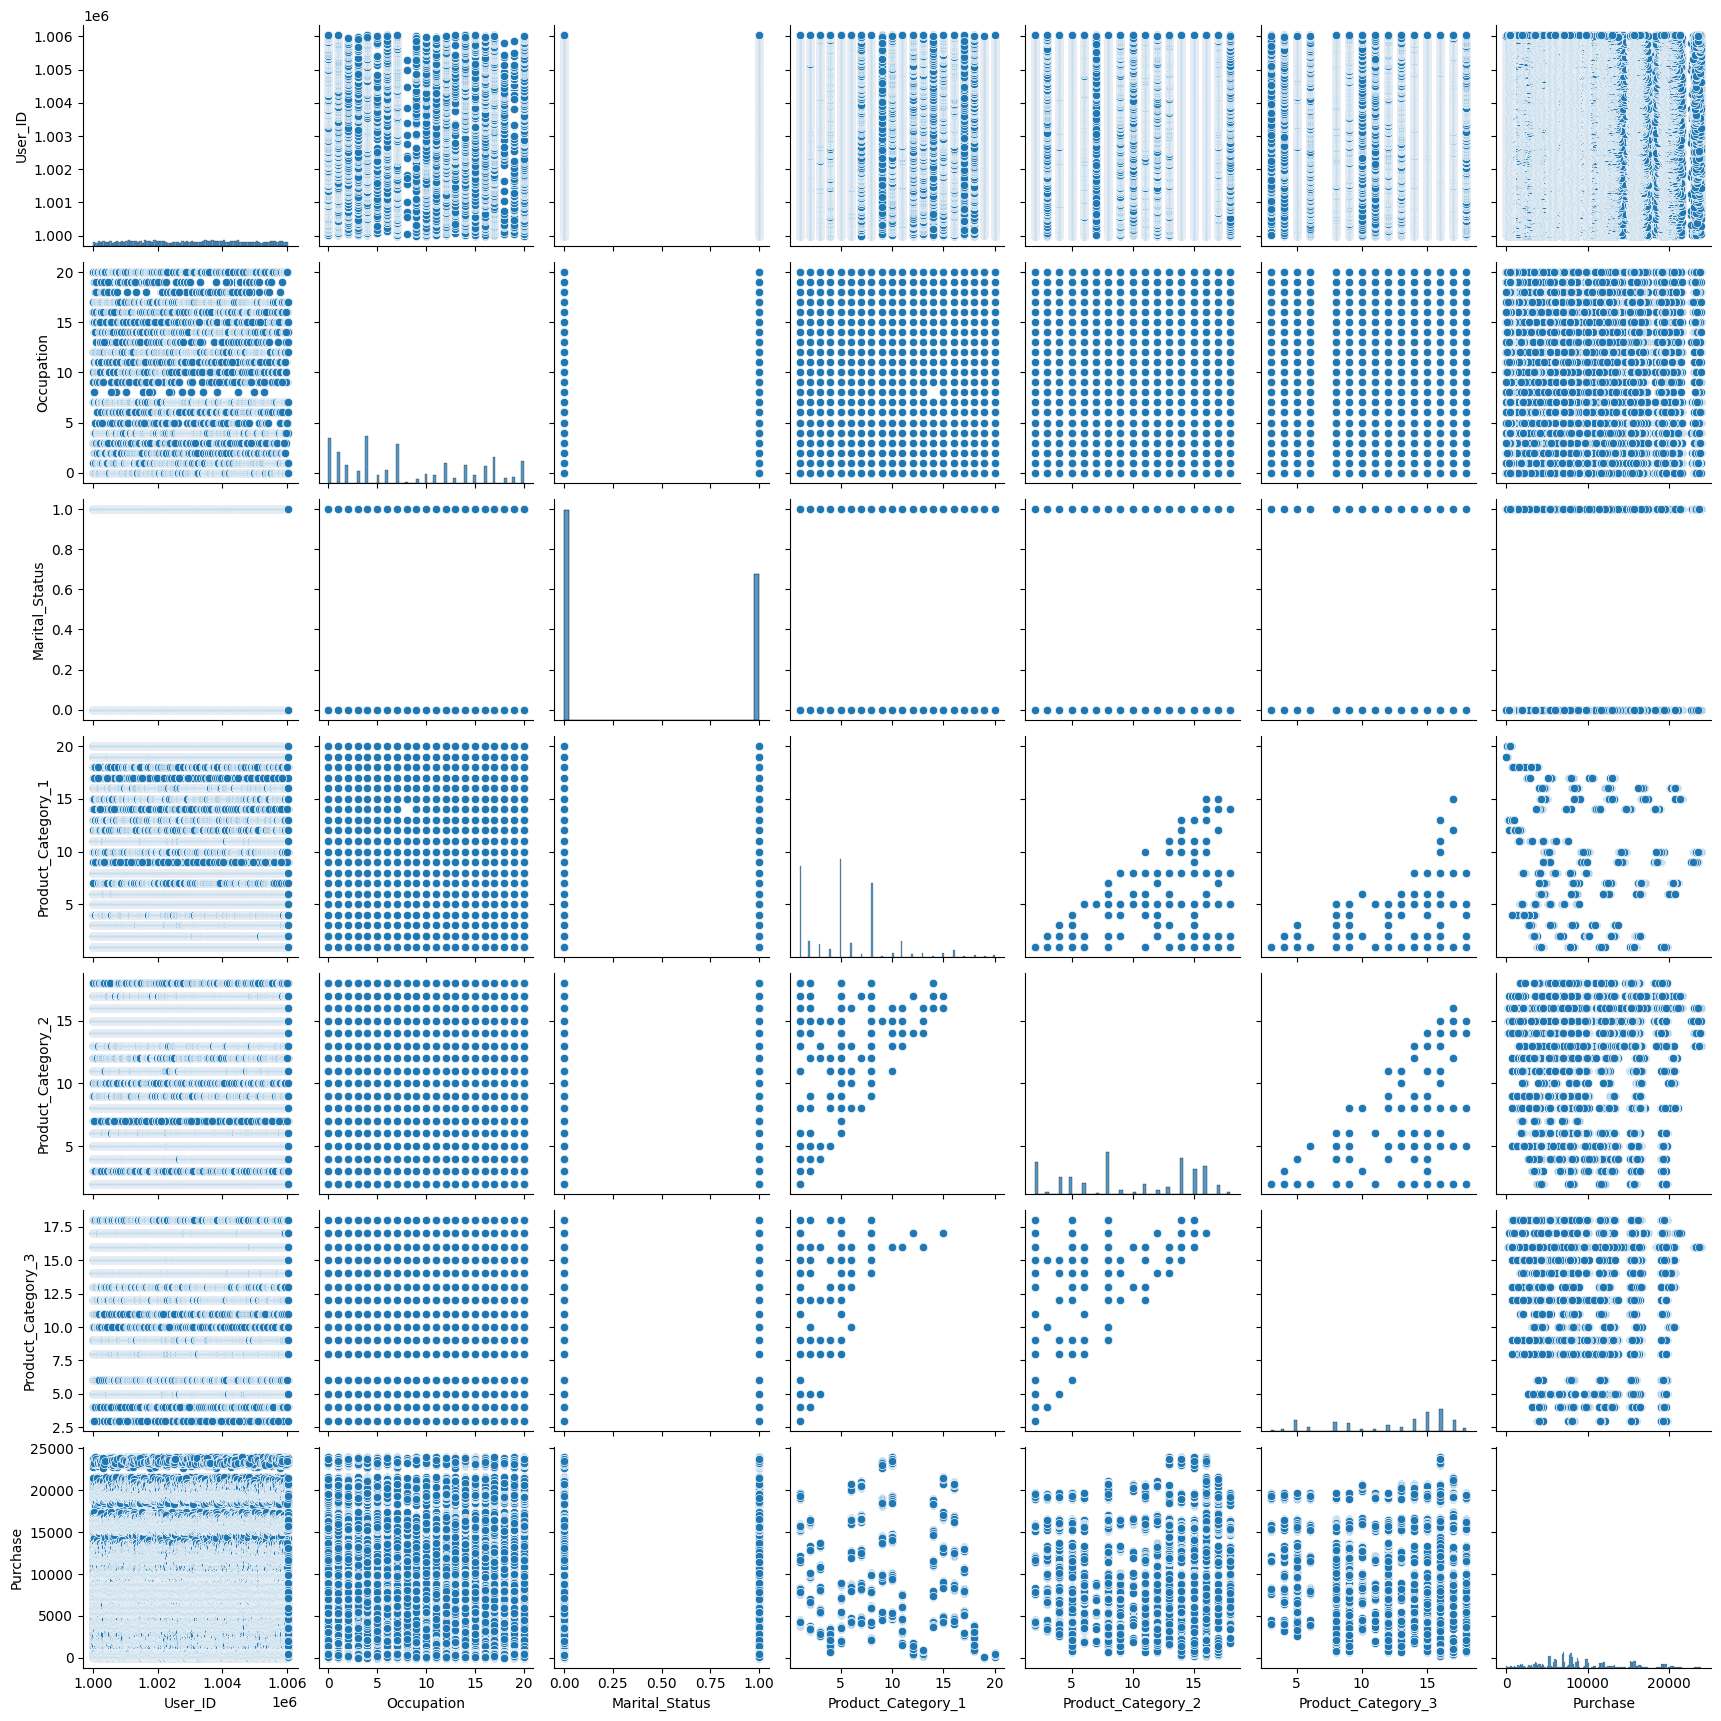

In [ ]:
# Creating a Pairplot for all features
plt.style.use('default')
sns.pairplot(train)
plt.show()

In [ ]:
train

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,NaN,NaN,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,NaN,NaN,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,NaN,NaN,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,NaN,NaN,365


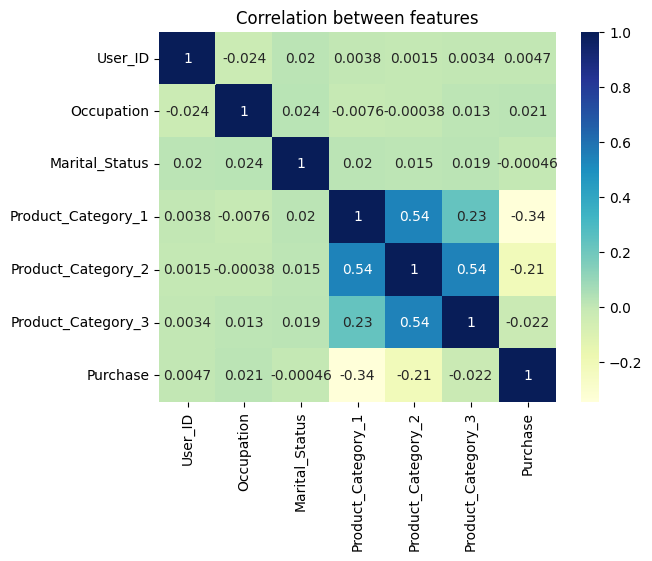

In [ ]:
# Correlation matrix heatmap
# Checking on correlation between the independent variables and depedent variables
sns.heatmap(train.corr(), annot = True, cmap="YlGnBu").set_title("Correlation between features") 
plt.show()

#### CHECKPOINT / OBSERVATIONS
* From the gender distribution plot we can see thatnumber of women was less than the number of men who shopped during Black Friday.
* From the correlation heatmap, we can observe following dependences: 
    * feature 'Purchase' is highly correlated with 'Product_Category_1' 
    * feature 'Purchase' is highly correlated with 'Product_Category_2'
  
  

## Data preprocessing

In [ ]:
train['source'] = 'train'
test['source'] = 'test'

In [ ]:
# train and test merge
merged_dataset = pd.concat([train, test])

In [ ]:
merged_dataset

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,source
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0,train
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0,train
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0,train
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0,train
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...
233594,1006036,P00118942,F,26-35,15,B,4+,1,8,NaN,NaN,NaN,test
233595,1006036,P00254642,F,26-35,15,B,4+,1,5,8.0,NaN,NaN,test
233596,1006036,P00031842,F,26-35,15,B,4+,1,1,5.0,12.0,NaN,test
233597,1006037,P00124742,F,46-50,1,C,4+,0,10,16.0,NaN,NaN,test


In [ ]:
# Dropping features we do not need
merged_dataset.drop('User_ID', axis = 1, inplace = True)
merged_dataset.drop('Product_Category_3', axis = 1, inplace = True)
merged_dataset.drop('Product_ID', axis = 1, inplace = True)

In [ ]:
# Necessary cleanup in 'Age' and 'Stay_In_Current_City_Years' columns where we need to replace '+' signs
merged_dataset['Age'] = merged_dataset['Age'].apply(lambda x : str(x).replace('55+', '55'))
merged_dataset['Stay_In_Current_City_Years'] = merged_dataset['Stay_In_Current_City_Years'].apply(lambda x : str(x).replace('4+', '4'))

In [ ]:
# Necessary Fix of null values in 'Product_Category_2'
merged_dataset['Product_Category_2'].fillna(merged_dataset['Product_Category_2'].median(), inplace = True)

In [ ]:
# Changing Stay_In_Current_City_Years' to integer(numeric data type)
merged_dataset['Stay_In_Current_City_Years'] = merged_dataset['Stay_In_Current_City_Years'].astype('int')

In [ ]:
merged_dataset['Stay_In_Current_City_Years']

0         2
1         2
2         2
3         2
4         4
         ..
233594    4
233595    4
233596    4
233597    4
233598    4
Name: Stay_In_Current_City_Years, Length: 783667, dtype: int64

In [ ]:
## Feature Encoding

from sklearn.preprocessing import LabelEncoder
#Age
label_encoder_age = LabelEncoder()
merged_dataset['Age'] = label_encoder_age.fit_transform(merged_dataset['Age'])
#City_Category
label_encoder_city = LabelEncoder()
merged_dataset['City_Category'] = label_encoder_city.fit_transform(merged_dataset['City_Category'])
#Gender
label_encoder_gender = LabelEncoder()
merged_dataset['Gender'] = label_encoder_gender.fit_transform(merged_dataset['Gender'])

In [ ]:
#merged_dataset['Age']

In [ ]:
#splitting merged dataset nto train and test
train = merged_dataset.loc[merged_dataset['source'] == 'train']
test = merged_dataset.loc[merged_dataset['source'] == 'test']

train.drop('source', axis = 1, inplace = True)
test.drop('source', axis = 1, inplace = True)

In [ ]:
#creating X and Y 
X = train.drop("Purchase", axis = 1)
y = train["Purchase"]

In [ ]:
X.shape, y.shape

((550068, 8), (550068,))

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(385047, 8) (385047,) (165021, 8) (165021,)


# Feature Selection

In [ ]:
# Using feature selection to select the best features for regression
bestfeatures = SelectKBest(score_func=f_regression, k=8)
fit = bestfeatures.fit(X_train, y_train)

# Creating new dataframe with columns and their corresponding scores
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X_train.columns)
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']
featureScores.sort_values("Score",ascending=False).head(12)

,Specs,Score
6,Product_Category_1,51158.351406
7,Product_Category_2,9883.978406
3,City_Category,1447.263199
0,Gender,1416.483810
2,Occupation,155.953600
1,Age,109.319538
4,Stay_In_Current_City_Years,13.639189
5,Marital_Status,0.335263


## Feature Scaling

## Reduction

In [ ]:
X_test[["Product_Category_1","Product_Category_2","City_Category","Gender","Occupation"]].shape
X_test_reduced.shape

(165021, 5)

In [ ]:
X_train_reduced = X_train[["Product_Category_1","Product_Category_2","City_Category","Gender","Occupation"]]
X_test_reduced= X_test[["Product_Category_1","Product_Category_2","City_Category","Gender","Occupation"]]
X_reduced=X[["Product_Category_1","Product_Category_2","City_Category","Gender","Occupation"]]
X_reduced.shape, X.shape

((550068, 5), (550068, 8))

In [ ]:


X_train_reduced

# Data Modelling

##### We will use multiple models here to review what could be the best. Our options are Linear Regression, Random Forest regressor, Decision Tree Regression and XGB Regressor.

### RandomForestRegressor

In [ ]:
rfr = RandomForestRegressor(n_estimators=10, random_state=42)
rfr.fit(X_train_reduced, np.ravel(y_train))


RandomForestRegressor(n_estimators=10, random_state=42)

In [ ]:
# Cross-validation

rfr_cross = RandomForestRegressor(n_estimators=10, random_state=42)
scores_rmse = cross_val_score(rfr_cross, X_train_reduced, np.ravel(y_train), cv=5, scoring='neg_mean_squared_error')
display_scores(scores_rmse)


Scores: [3001.48419882 3009.63091303 3003.27677015 3009.26611004 3010.53076621]
Mean: 3006.8377516477985
Standard deviation: 3.7061610489131183


##### Model Evaluation

In [ ]:
y_pred = rfr.predict(X_test_reduced)
print("Predicted purchases (in dollars) for new costumers:", y_pred)

Predicted purchases (in dollars) for new costumers: [ 7679.43235603   640.37166667 13675.09097863 ... 14448.13055279
 13776.04415422 12546.50667561]


In [ ]:
print("RMSE:", metrics.mean_squared_error(y_test, y_pred,squared=False))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('R2:', metrics.r2_score(y_test, y_pred))


RMSE: 3010.753096973233
MSE: 9064634.210933914
MAE: 2253.4987968636406
R2: 0.6401048227359458


##### Hyperparameter tuning

In [ ]:
%%time
rfr_param_grid = {
    'n_estimators': [4, 5, 10, 20, 50],
}
# we can bump up the max_iterations parameter, otherwise some of our models will fail to converge
rfr = RandomForestRegressor(random_state=42)
# we pass the model, our parameter grid, and cross-validation parameters to the class
#randomized_search_rf = RandomizedSearchCV(estimator=rfr, rfr_param_grid, random_state=0)
randomized_search_rf = RandomizedSearchCV(RandomForestRegressor(), rfr_param_grid, random_state=0, n_jobs=-1)
# last, we fit our data. This will take a while...
randomized_search_rf.fit(X=X, y=np.ravel(y))
print(randomized_search_rf.best_params_)
print("\n",randomized_search_rf.best_estimator_)

{'n_estimators': 50}

 RandomForestRegressor(n_estimators=50)


In [ ]:
final_model = randomized_search_rf.best_estimator_
scores_rsc = cross_val_score(final_model, X, np.ravel(y), cv=5, scoring='neg_mean_squared_error')
display_scores(scores_rsc)

Scores: [3023.32182122 3013.95662248 3020.22818461 3019.52624623 3022.6329324 ]
Mean: 3019.9331613856093
Standard deviation: 3.3088794139953683


In [ ]:
result = final_model.fit(X_train_reduced, np.ravel(y_train))
y_pred = result.predict(X_test_reduced)

In [ ]:
print("RMSE:", metrics.mean_squared_error(y_test, y_pred,squared=False))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('R2:', metrics.r2_score(y_test, y_pred))


RMSE: 3007.860206689251
MSE: 9047223.022984702
MAE: 2252.285874986663
R2: 0.6407961029826216


### Linear Regression

In [ ]:
lr = LinearRegression()
lr.fit(X_train_reduced, np.ravel(y_train))


LinearRegression()

In [ ]:
# Cross-validation

lr_cross = LinearRegression()
scores_nmse = cross_val_score(lr_cross, X_train_reduced, np.ravel(y_train), cv=5, scoring='neg_mean_squared_error')
display_scores(scores_nmse)

Scores: [4701.43089912 4683.46587791 4702.45464357 4699.27082464 4717.21179452]
Mean: 4700.7668079537925
Standard deviation: 10.726486242673984


##### Model Evaluation

In [ ]:
y_pred = lr.predict(X_test_reduced)
print("Predicted purchases (in dollars) for new costumers:", y_pred)

Predicted purchases (in dollars) for new costumers: [ 7383.9688813   6782.48183782 11949.5131017  ... 11260.855821
  4768.74501918 10831.16546575]


In [ ]:
print("RMSE:", metrics.mean_squared_error(y_test, y_pred,squared=False))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('R2:', metrics.r2_score(y_test, y_pred))


RMSE: 4688.717692948063
MSE: 21984073.60416421
MAE: 3592.2404593412093
R2: 0.12716146259788952


##### Hyperparameter tuning

In [ ]:
%%time
lr_param_grid = {
   "fit_intercept": [True, False],
   "normalize": [True, False]
}
# we can bump up the max_iterations parameter, otherwise some of our models will fail to converge
rfr = LinearRegression()
# we pass the model, our parameter grid, and cross-validation parameters to the class
randomized_search_lr = RandomizedSearchCV(rfr, lr_param_grid,n_jobs=-1)
# last, we fit our data. This will take a while...
randomized_search_lr.fit(X=X, y=np.ravel(y))
print(randomized_search_lr.best_params_)
print("\n",randomized_search_lr.best_estimator_)

{'normalize': True, 'fit_intercept': True}

 LinearRegression(normalize=True)


In [ ]:
final_model = randomized_search_lr.best_estimator_
scores_rsc = cross_val_score(final_model, X, np.ravel(y), cv=5, scoring='neg_mean_squared_error')
display_scores(scores_rsc)

Scores: [4693.32831411 4698.65512232 4710.79412312 4710.47489398 4673.21911438]
Mean: 4697.294313582674
Standard deviation: 13.807017972240262


In [ ]:
result = final_model.fit(X_train_reduced, np.ravel(y_train))
y_pred = result.predict(X_test_reduced)

In [ ]:
print("RMSE:", metrics.mean_squared_error(y_test, y_pred,squared=False))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('R2:', metrics.r2_score(y_test, y_pred))

RMSE: 4688.717692948063
MSE: 21984073.60416421
MAE: 3592.240459341209
R2: 0.12716146259788952


### Decision Tree Regressor

In [ ]:
dtr = DecisionTreeRegressor()
dtr.fit(X_train_reduced, np.ravel(y_train))


DecisionTreeRegressor()

In [ ]:
# Cross-validation

dtr_cross = DecisionTreeRegressor()
scores_nmse = cross_val_score(dtr_cross, X_train_reduced, np.ravel(y_train), cv=5, scoring='neg_mean_squared_error')
display_scores(scores_nmse)

Scores: [3007.2423721  3013.13836186 3008.42001996 3016.32312451 3016.95402536]
Mean: 3012.415580756888
Standard deviation: 3.977823121958534


##### Model Evaluation

In [ ]:
y_pred = lr.predict(X_test_reduced)
print("Predicted purchases (in dollars) for new costumers:", y_pred)

Predicted purchases (in dollars) for new costumers: [ 7383.9688813   6782.48183782 11949.5131017  ... 11260.855821
  4768.74501918 10831.16546575]


In [ ]:
print("RMSE:", metrics.mean_squared_error(y_test, y_pred,squared=False))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('R2:', metrics.r2_score(y_test, y_pred))

RMSE: 4688.717692948063
MSE: 21984073.60416421
MAE: 3592.2404593412093
R2: 0.12716146259788952


##### Hyperparameter tuning

In [ ]:
%%time
dtr_param_grid = {
            "splitter":["best","random"],
            "max_depth" : [1,3,5,7,9,11,12],
           "min_samples_leaf":[1,2,3,4,5,6,7,8,9,10],
           "min_weight_fraction_leaf":[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],
           "max_features":["auto","log2","sqrt",None],
           "max_leaf_nodes":[None,10,20,30,40,50,60,70,80,90] 
}
# we can bump up the max_iterations parameter, otherwise some of our models will fail to converge
dtr = DecisionTreeRegressor()
# we pass the model, our parameter grid, and cross-validation parameters to the class
randomized_search_dtr = RandomizedSearchCV(dtr, dtr_param_grid,n_jobs=-1)
# last, we fit our data. This will take a while...
randomized_search_dtr.fit(X=X, y=np.ravel(y))
print(randomized_search_dtr.best_params_)
print("\n",randomized_search_dtr.best_estimator_)

{'splitter': 'random', 'min_weight_fraction_leaf': 0.1, 'min_samples_leaf': 10, 'max_leaf_nodes': None, 'max_features': 'auto', 'max_depth': 9}

 DecisionTreeRegressor(max_depth=9, max_features='auto', min_samples_leaf=10,
                      min_weight_fraction_leaf=0.1, splitter='random')


In [ ]:
final_model = randomized_search_dtr.best_estimator_
scores_rsc = cross_val_score(final_model, X, np.ravel(y), cv=5, scoring='neg_mean_squared_error')
display_scores(scores_rsc)

Scores: [4266.61193027 4254.67365069 4263.44394848 4104.06481523 4849.459021  ]
Mean: 4347.650673134059
Standard deviation: 258.24347627061667


In [ ]:
result = final_model.fit(X_train_reduced, np.ravel(y_train))
y_pred = result.predict(X_test_reduced)

In [ ]:
print("RMSE:", metrics.mean_squared_error(y_test, y_pred,squared=False))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('R2:', metrics.r2_score(y_test, y_pred))

RMSE: 4241.332032722183
MSE: 17988897.41179528
MAE: 3172.6730206975417
R2: 0.2857828267362671


### XGB Regressor

In [ ]:
xgbr = xgb.XGBRegressor(verbosity=0) 
xgbr.fit(X_train_reduced, np.ravel(y_train))

XGBRegressor(verbosity=0)

In [ ]:
# Cross-validation

xgbr_cross = xgb.XGBRegressor(verbosity=0) 
scores_nmse = cross_val_score(xgbr_cross, X_train_reduced, np.ravel(y_train), cv=5, scoring='neg_mean_squared_error')
display_scores(scores_nmse)

Scores: [2991.04853669 2993.31752969 2995.91780029 3003.23007368 2999.06061245]
Mean: 2996.5149105616492
Standard deviation: 4.290338965637238


##### Model Evaluation

In [ ]:
score = xgbr.score(X_train_reduced, np.ravel(y_train)) 
print("Training score: ", score)

Training score:  0.6447447711426204


In [ ]:
scores = cross_val_score(xgbr, X_train_reduced, np.ravel(y_train),cv=10)
print("Mean cross-validation score: %.2f" % scores.mean())

Mean cross-validation score: 0.64


In [ ]:
y_pred = xgbr.predict(X_test_reduced)
print("Predicted purchases (in dollars) for new costumers:", y_pred)

Predicted purchases (in dollars) for new costumers: [ 7468.883   1422.8275 13977.694  ... 14270.598  14255.553  13444.47  ]


In [ ]:
print("RMSE:", metrics.mean_squared_error(y_test, y_pred,squared=False))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('R2:', metrics.r2_score(y_test, y_pred))

RMSE: 3005.3406070723713
MSE: 9032072.16451813
MAE: 2275.5933171430966
R2: 0.6413976408678406


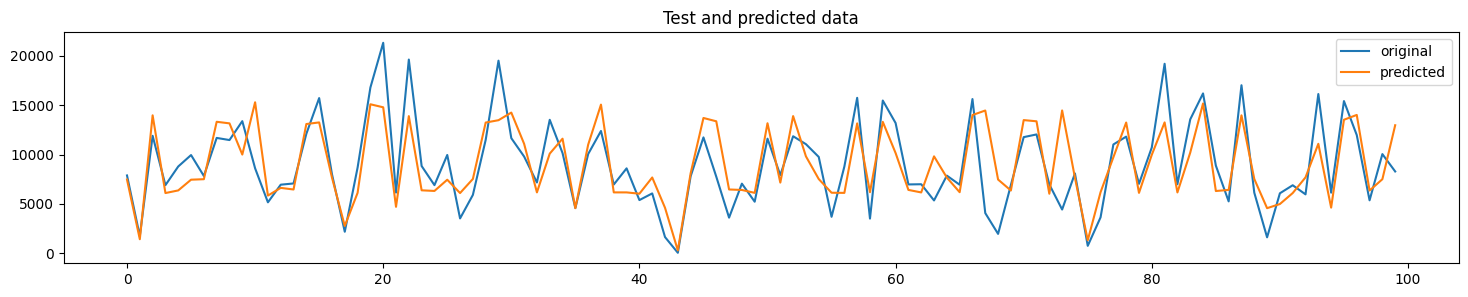

In [ ]:
plt.rcParams["figure.figsize"] = (18,3)
x_ax = range(100)
plt.plot(x_ax, y_test[0:100], label="original")
plt.plot(x_ax, y_pred[0:100], label="predicted")
plt.title("Test and predicted data")
plt.legend()
plt.show()

##### Hyperparameter tuning

In [ ]:
%%time
xgbr_param_grid = {
        #'learning_rate': [0.01, 0.1],
        'max_depth': [3, 5, 7],
        #'min_child_weight': [1, 3, 5],
        #'subsample': [0.5, 0.7],
        #'colsample_bytree': [0.5, 0.7],
        #'n_estimators' : [1, 2, 5],
        #'objective': ['reg:squarederror']
  
}
# we can bump up the max_iterations parameter, otherwise some of our models will fail to converge
xgbr = xgb.XGBRegressor(verbosity=0)
# we pass the model, our parameter grid, and cross-validation parameters to the class
randomized_search_xgbr = RandomizedSearchCV(xgbr, xgbr_param_grid,n_jobs=-1)
# last, we fit our data. This will take a while...
randomized_search_xgbr.fit(X=X, y=np.ravel(y))
print(randomized_search_xgbr.best_params_)
print("\n",randomized_search_xgbr.best_estimator_)

{'max_depth': 7}

 XGBRegressor(max_depth=7, verbosity=0)
CPU times: user 1min 3s, sys: 247 ms, total: 1min 4s
Wall time: 8min 14s


In [ ]:
final_model = randomized_search_xgbr.best_estimator_
scores_rsc = cross_val_score(final_model, X, np.ravel(y), cv=5, scoring='neg_mean_squared_error')
display_scores(scores_rsc)

Scores: [2943.08164252 2935.72149554 2937.92332513 2942.36781236 2949.97771798]
Mean: 2941.8143987063536
Standard deviation: 4.915605308334682


In [ ]:
result = final_model.fit(X_train_reduced, np.ravel(y_train))
y_pred = result.predict(X_test_reduced)

In [ ]:
print("RMSE:", metrics.mean_squared_error(y_test, y_pred,squared=False))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('R2:', metrics.r2_score(y_test, y_pred))

RMSE: 2979.8634765362563
MSE: 8879586.338794744
MAE: 2241.142175794191
R2: 0.6474518193379192


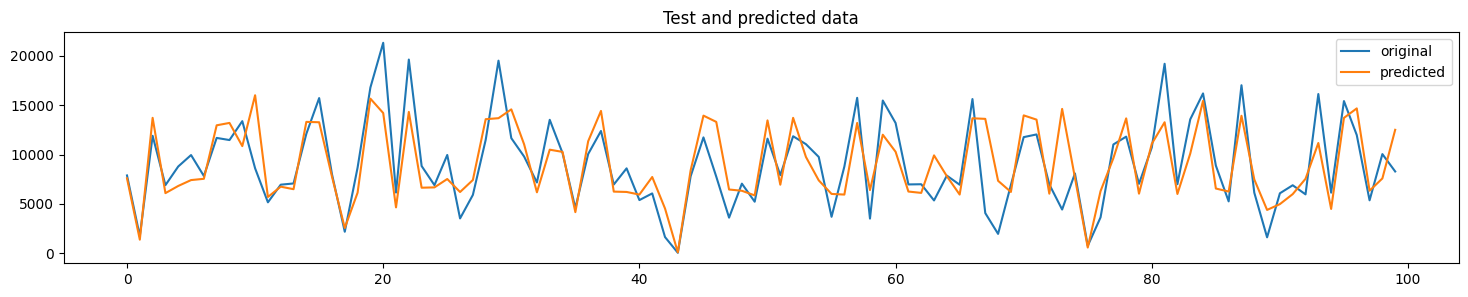

In [ ]:
plt.rcParams["figure.figsize"] = (18,3)
x_ax = range(100)
plt.plot(x_ax, y_test[0:100], label="original")
plt.plot(x_ax, y_pred[0:100], label="predicted")
plt.title("Test and predicted data")
plt.legend()
plt.show()

# SUMMARY / Conclusion